In [18]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import docx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)

sns.set_palette("viridis")

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx -0.022799
1    Abn_Barlow_05_Transgender_v2.docx -0.025626
2    Abn_Barlow_06_Transgender_v2.docx  0.006369
3    Abn_Barlow_07_Transgender_v2.docx -0.062992
4       Abn_Barlow_08_Transgender.docx -0.009465
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103
234  Spcl_Turnbull_06_Transgender.docx  0.00

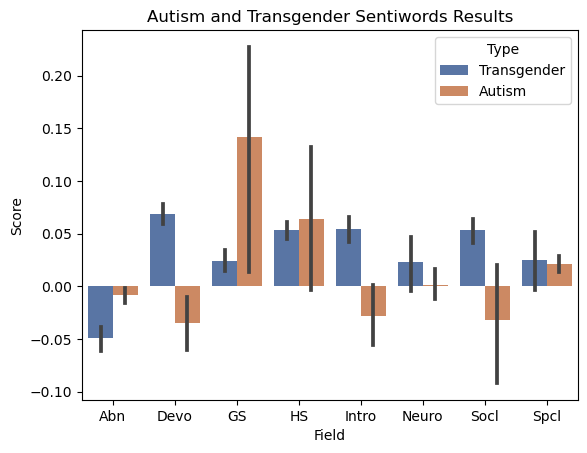

In [2]:
# SentiWords

# Getting the autism data frame

df_autism_sentiwords = pd.read_csv("sentiments_sentiwords_3_15_2024_autism.csv", low_memory=False)
df_autism_sentiwords = df_autism_sentiwords.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the transgender data frame

df_transgender_sentiwords = pd.read_csv("sentiments_sentiwords_3_15_2024_transgender.csv", low_memory=False)
df_transgender_sentiwords = df_transgender_sentiwords.sort_values("Textbook")

print(df_transgender_sentiwords)

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

df_autism_sentiwords_fields = pd.read_csv("field_df_sentiwords_autism.csv", low_memory=False)
df_transgender_sentiwords_fields = pd.read_csv("field_df_sentiwords_transgender.csv", low_memory=False)

ttest_sentiwords = stats.ttest_ind(df_autism_sentiwords_fields["Score"], df_transgender_sentiwords_fields["Score"], equal_var=False)
print("Overall: ", ttest_sentiwords) # autism vs transgender scores in general are significantly different

ttest_sentiwords_abn = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Abn']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Abn']["Score"], equal_var=False)
print("Abnormal: ", ttest_sentiwords_abn) 

ttest_sentiwords_devo = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Devo']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Devo']["Score"], equal_var=False)
print("Developmental: ", ttest_sentiwords_devo) 

ttest_sentiwords_gs = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'GS']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'GS']["Score"], equal_var=False)
print("Gender Studies: ", ttest_sentiwords_gs) 

ttest_sentiwords_hs = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'HS']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'HS']["Score"], equal_var=False)
print("Human Sexuality: ", ttest_sentiwords_hs) 

ttest_sentiwords_intro = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Intro']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Intro']["Score"], equal_var=False)
print("Introductory: ", ttest_sentiwords_intro) 

ttest_sentiwords_neuro = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Neuro']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Neuro']["Score"], equal_var=False)
print("Neuroscience: ", ttest_sentiwords_neuro) 

ttest_sentiwords_socl = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Socl']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Socl']["Score"], equal_var=False)
print("Social: ", ttest_sentiwords_socl) 

ttest_sentiwords_spcl = stats.ttest_ind(df_autism_sentiwords_fields[df_autism_sentiwords_fields['Field'] == 'Spcl']["Score"], 
                                       df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Spcl']["Score"], equal_var=False)
print("Special Education: ", ttest_sentiwords_spcl) 

# Graph fields together

# Make new dataframe

# Combine textbooks

df_transgender_sentiwords_fields["Type"] = "Transgender"
df_autism_sentiwords_fields["Type"] = "Autism"

alphabetical_transgender_sentiwords = df_transgender_sentiwords_fields["Textbook"].str.split("_").values 
beginning_transgender_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_sentiwords.append(new_text_name)

df_transgender_sentiwords_fields["Common_Textbook"] = beginning_transgender_sentiwords

alphabetical_autism_sentiwords = df_autism_sentiwords_fields["Textbook"].str.split("_").values 
beginning_autism_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_sentiwords.append(new_text_name)

df_autism_sentiwords_fields["Common_Textbook"] = beginning_autism_sentiwords

# print(df_autism_sentiwords_fields)

combined_df_sentiwords = df_transgender_sentiwords_fields.merge(df_autism_sentiwords_fields, how='outer', on=['Common_Textbook', 'Field', "Type", "Score"])

# print(combined_df_sentiwords)

fig, ax = plt.subplots()

sns.barplot(ax=ax, x="Field", y="Score", hue="Type", palette="deep", data=combined_df_sentiwords)

ax.set_title("Autism and Transgender Sentiwords Results")

plt.savefig('fields_comparison_sentiwords.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx  0.282339
1    Abn_Barlow_05_Transgender_v2.docx -0.049555
2    Abn_Barlow_06_Transgender_v2.docx -0.045714
3    Abn_Barlow_07_Transgender_v2.docx -0.783257
4       Abn_Barlow_08_Transgender.docx -0.575150
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.699332
234  Spcl_Turnbull_06_Transgender.docx  0.29

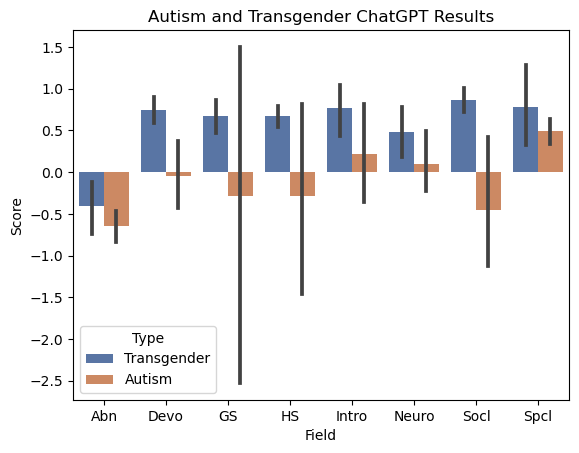

In [3]:
# ChatGPT

# Getting the autism data frame

df_autism_chatgpt = pd.read_csv("chatgpt_sentiments_autism_03_09_2024_official.csv", low_memory=False)
df_autism_chatpg = df_autism_chatgpt.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the transgender data frame

df_transgender_chatgpt = pd.read_csv("chatgpt_sentiments_transgender_03_13_2024_official.csv", low_memory=False)
df_transgender_chatgpt = df_transgender_chatgpt.sort_values("Textbook")

print(df_transgender_chatgpt)

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

df_autism_chatgpt_fields = pd.read_csv("field_df_autism_chatgpt.csv", low_memory=False)
df_transgender_chatgpt_fields = pd.read_csv("field_df_transgender_chatgpt.csv", low_memory=False)

ttest_sentiwords = stats.ttest_ind(df_autism_chatgpt_fields["Score"], df_transgender_chatgpt_fields["Score"], equal_var=False)
print("Overall: ", ttest_sentiwords) # autism vs transgender scores in general are significantly different

ttest_sentiwords_abn = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Abn']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Abn']["Score"], equal_var=False)
print("Abnormal: ", ttest_sentiwords_abn) 

ttest_sentiwords_devo = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Devo']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Devo']["Score"], equal_var=False)
print("Developmental: ", ttest_sentiwords_devo) 

ttest_sentiwords_gs = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'GS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'GS']["Score"], equal_var=False)
print("Gender Studies: ", ttest_sentiwords_gs) 

ttest_sentiwords_hs = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'HS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'HS']["Score"], equal_var=False)
print("Human Sexuality: ", ttest_sentiwords_hs) 

ttest_sentiwords_intro = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Intro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Intro']["Score"], equal_var=False)
print("Introductory: ", ttest_sentiwords_intro) 

ttest_sentiwords_neuro = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Neuro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Neuro']["Score"], equal_var=False)
print("Neuroscience: ", ttest_sentiwords_neuro) 

ttest_sentiwords_socl = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Socl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Socl']["Score"], equal_var=False)
print("Social: ", ttest_sentiwords_socl) 

ttest_sentiwords_spcl = stats.ttest_ind(df_autism_chatgpt_fields[df_autism_chatgpt_fields['Field'] == 'Spcl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Spcl']["Score"], equal_var=False)
print("Special Education: ", ttest_sentiwords_spcl) 

# Graph fields together

# Make new dataframe

# Combine textbooks

df_transgender_chatgpt_fields["Type"] = "Transgender"
df_autism_chatgpt_fields["Type"] = "Autism"

alphabetical_transgender_chatgpt = df_transgender_chatgpt_fields["Textbook"].str.split("_").values 
beginning_transgender_chatgpt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_chatgpt.append(new_text_name)

df_transgender_chatgpt_fields["Common_Textbook"] = beginning_transgender_chatgpt

alphabetical_autism_chatgpt = df_autism_chatgpt_fields["Textbook"].str.split("_").values 
beginning_autism_chatgpt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_chatgpt.append(new_text_name)

df_autism_chatgpt_fields["Common_Textbook"] = beginning_autism_chatgpt

# print(df_autism_sentiwords_fields)

combined_df_chatgpt = df_transgender_chatgpt_fields.merge(df_autism_chatgpt_fields, how='outer', on=['Common_Textbook', 'Field', "Type", "Score"])

print(combined_df_chatgpt)
# print(combined_df_sentiwords)

fig, ax = plt.subplots()

sns.barplot(ax=ax, x="Field", y="Score", hue="Type", palette="deep", data=combined_df_chatgpt)

ax.set_title("Autism and Transgender ChatGPT Results")

plt.savefig('fields_comparison_chatgpt.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.d

group1,group2,meandiff,p-adj,lower,upper,reject
ChatGPT,Dictionary,0.2543,0.0004,0.099,0.4097,True
ChatGPT,SentiWordsNet,0.0267,0.9139,-0.1286,0.1821,False
Dictionary,SentiWordsNet,-0.2276,0.0018,-0.3829,-0.0723,True


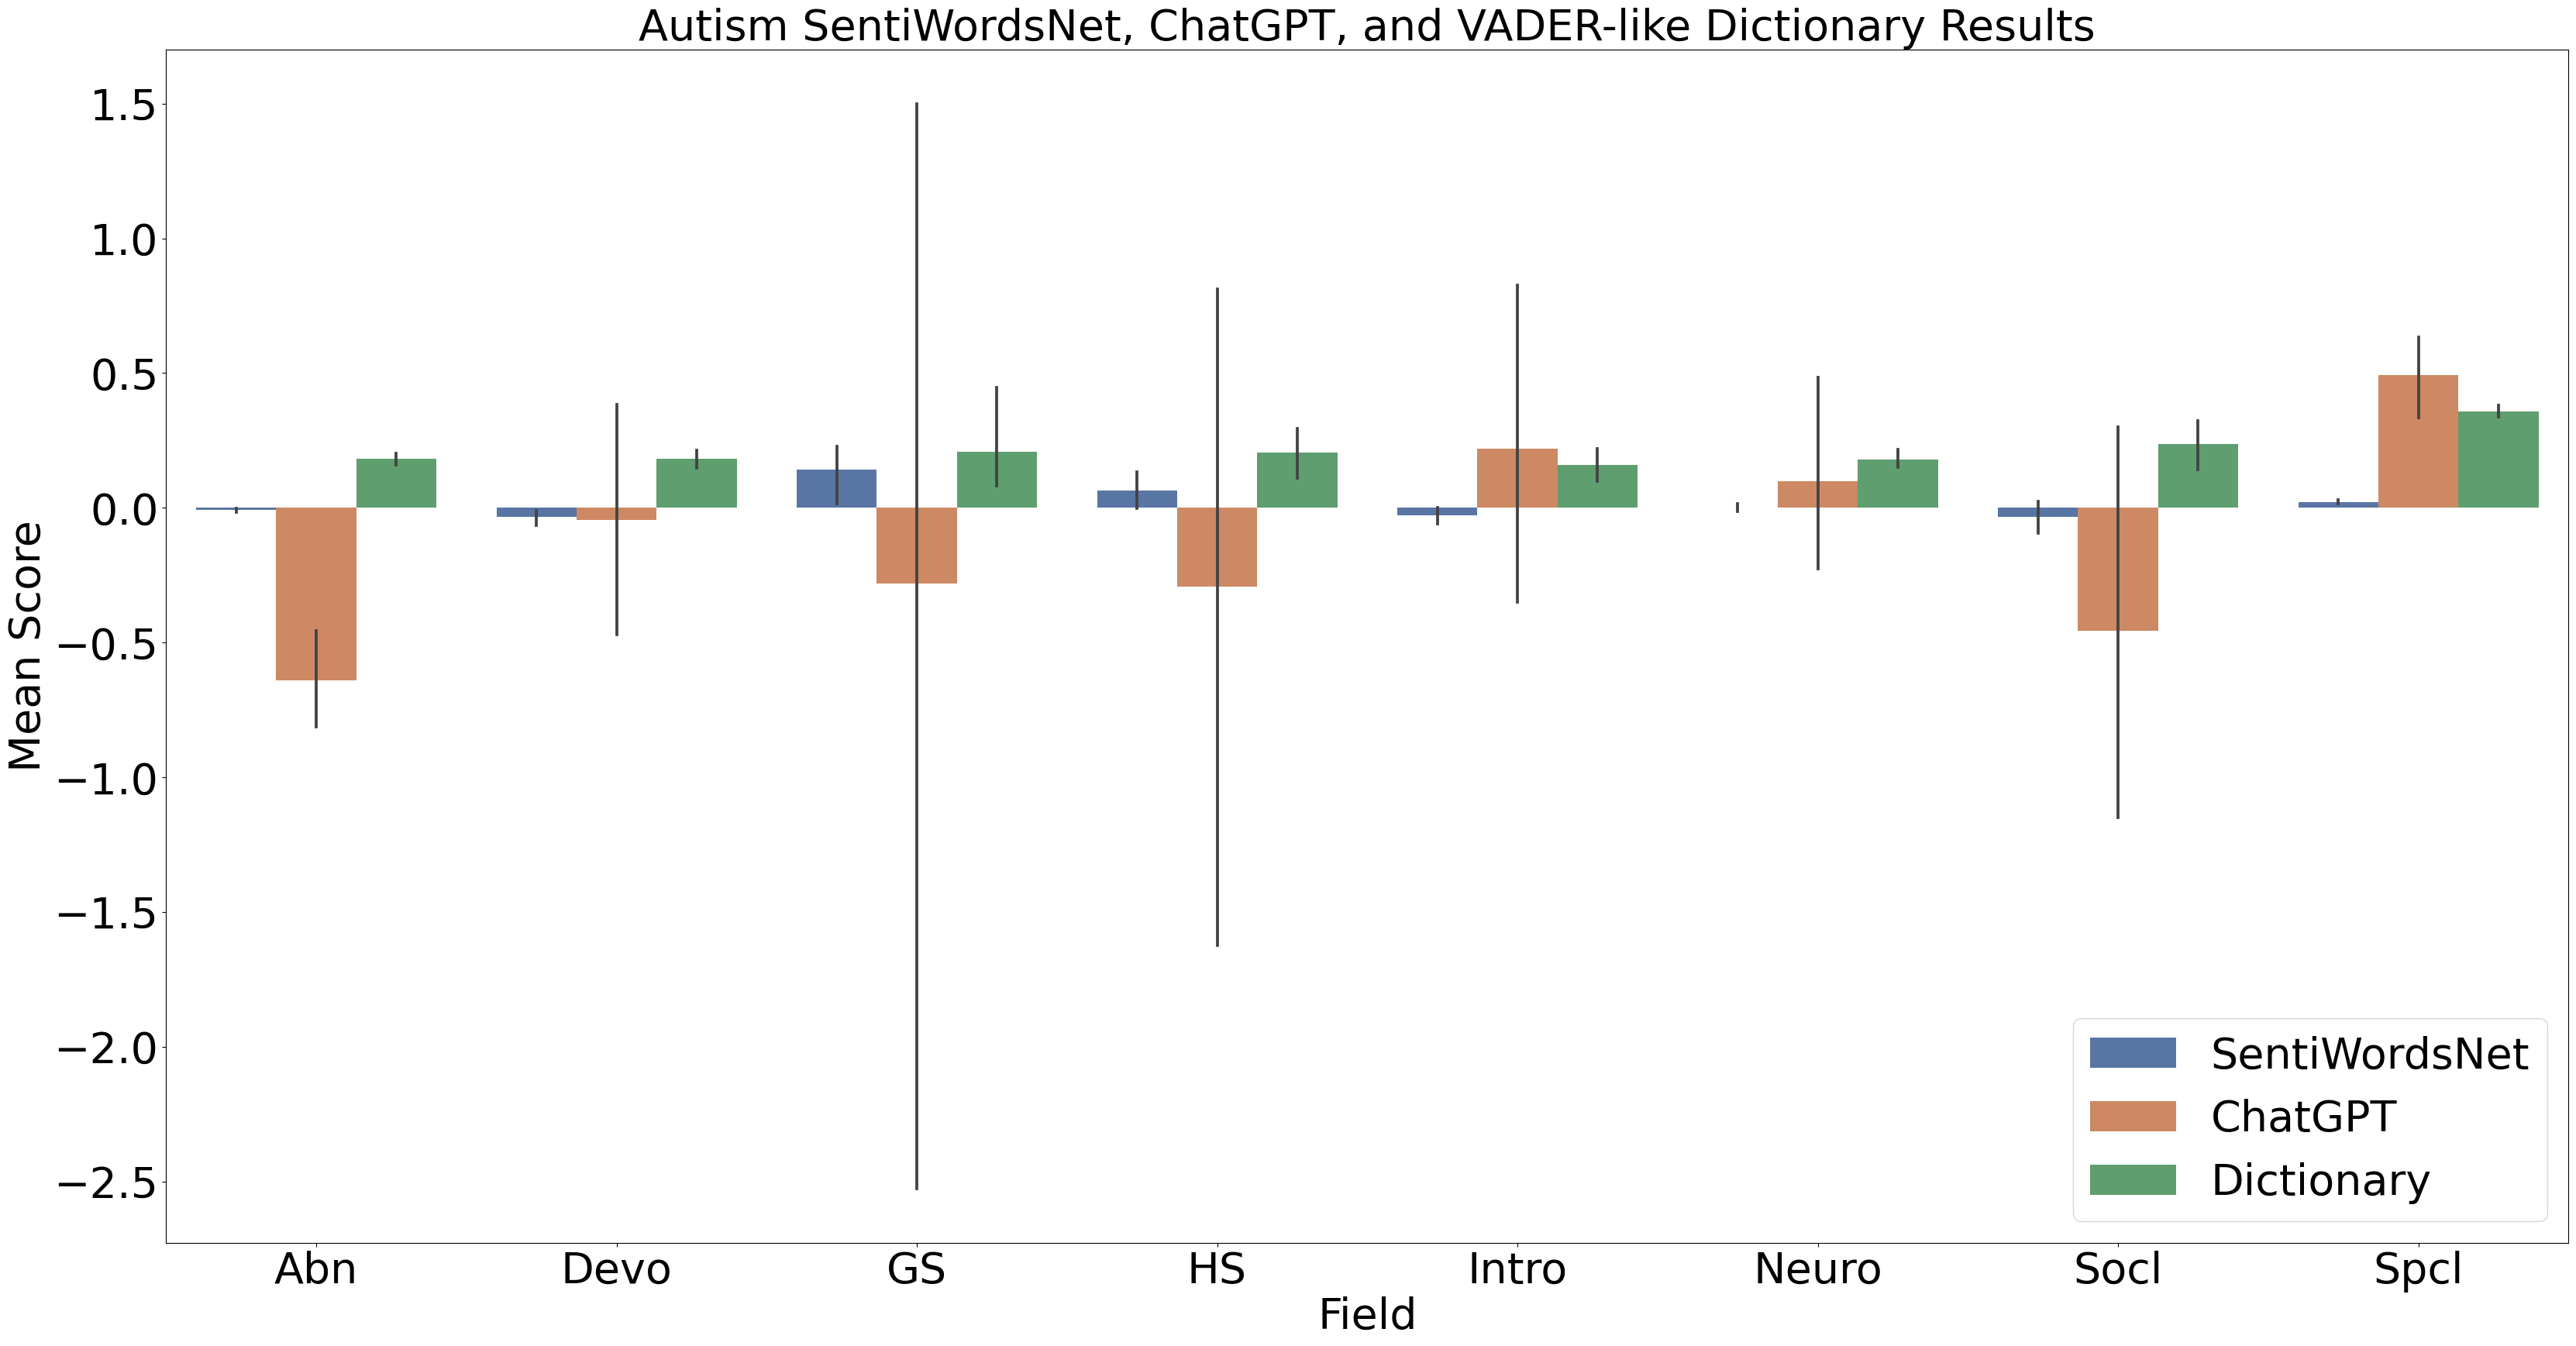

In [37]:
# Autism Only (Including VADER-like Dictionary)

# SentiWords

# Getting the sentiwords data frame

df_autism_sentiwords = pd.read_csv("sentiments_sentiwords_3_15_2024_autism.csv", low_memory=False)
df_autism_sentiwords = df_autism_sentiwords.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the chatgpt data frame

df_autism_chatgpt = pd.read_csv("chatgpt_sentiments_autism_03_09_2024_official.csv", low_memory=False)
df_autism_chatpg = df_autism_chatgpt.sort_values("Textbook")

print(df_autism_sentiwords)

# Getting the VADER-like data frame

df_autism = pd.read_csv("sentiments_3_19_2024_autism.csv", low_memory=False)
df_autism = df_autism.sort_values("Textbook")

print(df_autism)

df_autism_sentiwords_fields = pd.read_csv("field_df_sentiwords_autism.csv", low_memory=False)
df_autism_chatgpt_fields = pd.read_csv("field_df_autism_chatgpt.csv", low_memory=False)
df_autism = pd.read_csv("field_df_autism.csv", low_memory=False)

# Graph fields together

# Make new dataframe

# Combine textbooks

df_autism_chatgpt_fields["Method"] = "ChatGPT"
df_autism_sentiwords_fields["Method"] = "SentiWordsNet"
df_autism["Method"] = "Dictionary"

alphabetical_autism_chatgpt = df_autism_chatgpt_fields["Textbook"].str.split("_").values 
beginning_autism_chatpgt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_chatpgt.append(new_text_name)

df_autism_chatgpt_fields["Common_Textbook"] = beginning_autism_chatgpt

alphabetical_autism_sentiwords = df_autism_sentiwords_fields["Textbook"].str.split("_").values 
beginning_autism_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism_sentiwords.append(new_text_name)

df_autism_sentiwords_fields["Common_Textbook"] = beginning_autism_sentiwords

alphabetical_autism = df_autism["Textbook"].str.split("_").values 
beginning_autism = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_autism:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_autism.append(new_text_name)

df_autism["Common_Textbook"] = beginning_autism

# print(df_autism_sentiwords_fields)

combined_df_autism_intermediate = df_autism_sentiwords_fields.merge(df_autism_chatgpt_fields, how='outer', on=['Common_Textbook', 'Field', "Method", "Score"])
combined_df_autism = combined_df_autism_intermediate.merge(df_autism, how="outer", on=['Common_Textbook', 'Field', "Method", "Score"])

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

anova = f_oneway(combined_df_autism[combined_df_autism['Method'] == 'ChatGPT']["Score"], combined_df_autism[combined_df_autism['Method'] == 'SentiWordsNet']['Score'],
        combined_df_autism[combined_df_autism['Method'] == 'Dictionary']['Score'])

print(anova)

# Post-hoc testing

comp = mc.MultiComparison(combined_df_autism['Score'], combined_df_autism['Method'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())

# print(combined_df_sentiwords)

fig, ax = plt.subplots(figsize=(40, 20))

sns.barplot(ax=ax, x="Field", y="Score", hue="Method", palette="deep", data=combined_df_autism)

ax.set_title("Autism SentiWordsNet, ChatGPT, and VADER-like Dictionary Results", fontsize=40)
plt.xlabel("Field", fontsize=40)
plt.ylabel("Mean Score", fontsize=40)
ax.legend(loc="lower right", fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.savefig('fields_comparison_autism.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

Overall:  TtestResult(statistic=-8.71291514040457, pvalue=5.032689482574602e-16, df=238.79180813768744)
Abnormal:  TtestResult(statistic=2.024082726130589, pvalue=0.050210470060738525, df=37.082889854940014)
Developmental:  TtestResult(statistic=-8.167898019025829, pvalue=5.351076304136395e-10, df=39.2938734590745)
Gender Studies:  TtestResult(statistic=-6.206587433924986, pvalue=1.4198114954148478e-06, df=26.118580049223507)
Human Sexuality:  TtestResult(statistic=-10.081218253064536, pvalue=2.4942496103017876e-09, df=20.201842627142014)
Introductory:  TtestResult(statistic=-4.494293675169754, pvalue=5.5803819201612715e-05, df=41.13052440171306)
Neuroscience:  TtestResult(statistic=-2.9503040326545698, pvalue=0.007325085712333743, df=22.3205585584479)
Social:  TtestResult(statistic=-10.399093253159572, pvalue=1.2717698184940063e-10, df=25.290822542370645)
Special Education:  TtestResult(statistic=-2.982236280978878, pvalue=0.007331960090848687, df=20.118462516529917)


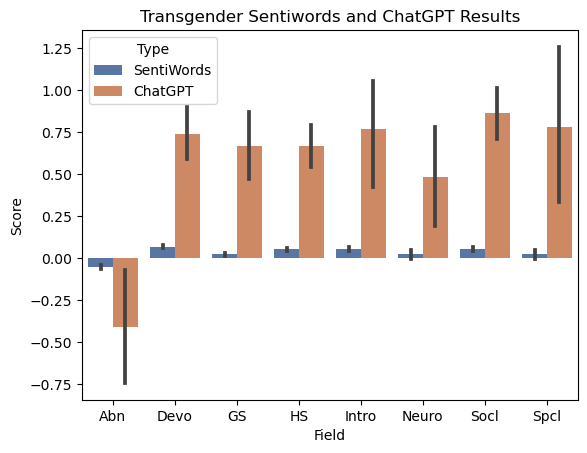

In [5]:
# Transgender Only

# Graph fields together

# Make new dataframe

# Combine textbooks

df_transgender_chatgpt_fields["Type"] = "ChatGPT"
df_transgender_sentiwords_fields["Type"] = "SentiWords"

alphabetical_transgender_chatgpt = df_transgender_chatgpt_fields["Textbook"].str.split("_").values 
beginning_transgender_chatpgt = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_chatgpt:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_chatpgt.append(new_text_name)

df_transgender_chatgpt_fields["Common_Textbook"] = beginning_transgender_chatpgt

alphabetical_transgender_sentiwords = df_transgender_sentiwords_fields["Textbook"].str.split("_").values 
beginning_transgender_sentiwords = [] # Get only the beginning of the textbook, before "transgender"
for l in alphabetical_transgender_sentiwords:
    new_text_name = l[0] + "_" + l[1] + "_" + l[2]
    beginning_transgender_sentiwords.append(new_text_name)

df_transgender_sentiwords_fields["Common_Textbook"] = beginning_transgender_sentiwords

combined_df_transgender = df_transgender_sentiwords_fields.merge(df_transgender_chatgpt_fields, how='outer', on=['Common_Textbook', 'Field', "Type", "Score"])


# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

# df_transgender_sentiwords_fields = pd.read_csv("field_df_transgender_sentiwords.csv", low_memory=False)
# df_transgender_chatgpt_fields = pd.read_csv("field_df_transgender_chatgpt.csv", low_memory=False)

ttest_transgender = stats.ttest_ind(df_transgender_sentiwords_fields["Score"], df_transgender_chatgpt_fields["Score"], equal_var=False)
print("Overall: ", ttest_transgender) 

ttest_transgender_abn = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Abn']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Abn']["Score"], equal_var=False)
print("Abnormal: ", ttest_transgender_abn) 

ttest_transgender_devo = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Devo']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Devo']["Score"], equal_var=False)
print("Developmental: ", ttest_transgender_devo) 

ttest_transgender_gs = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'GS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'GS']["Score"], equal_var=False)
print("Gender Studies: ", ttest_transgender_gs) 

ttest_transgender_hs = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'HS']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'HS']["Score"], equal_var=False)
print("Human Sexuality: ", ttest_transgender_hs) 

ttest_transgender_intro = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Intro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Intro']["Score"], equal_var=False)
print("Introductory: ", ttest_transgender_intro) 

ttest_transgender_neuro = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Neuro']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Neuro']["Score"], equal_var=False)
print("Neuroscience: ", ttest_transgender_neuro) 

ttest_transgender_socl = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Socl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Socl']["Score"], equal_var=False)
print("Social: ", ttest_transgender_socl) 

ttest_transgender_spcl = stats.ttest_ind(df_transgender_sentiwords_fields[df_transgender_sentiwords_fields['Field'] == 'Spcl']["Score"], 
                                       df_transgender_chatgpt_fields[df_transgender_chatgpt_fields['Field'] == 'Spcl']["Score"], equal_var=False)
print("Special Education: ", ttest_transgender_spcl) 

fig, ax = plt.subplots()

sns.barplot(ax=ax, x="Field", y="Score", hue="Type", palette="deep", data=combined_df_transgender)

ax.set_title("Transgender Sentiwords and ChatGPT Results")

plt.savefig('fields_comparison_transgender.png')

# comp = mc.MultiComparison(df['Score'], df['Field'])
# post_hoc_res = comp.tukeyhsd()
# display(post_hoc_res.summary())

In [6]:
# Historical Data:

# Import dataframes

graphing_years_sentiwords_autism = pd.read_csv("graphing_years_sentiwords_autism.csv", low_memory=False)
graphing_years_chatgpt_autism = pd.read_csv("graphing_years_chatgpt_autism.csv", low_memory=False)
graphing_years_chatgpt_transgender = pd.read_csv("graphing_years_chatgpt_transgender.csv", low_memory=False)
graphing_years_dictionary_autism = pd.read_csv("graphing_years_dictionary_autism.csv", low_memory=False)
graphing_years_sentiwords_transgender = pd.read_csv("graphing_years_sentiwords_transgender.csv", low_memory=False)

print(graphing_years_sentiwords_transgender)

    Unnamed: 0  Year     Score
0         1988  1988 -0.047170
1         1997  1997  0.017638
2         1999  1999  0.035964
3         2000  2000  0.062334
4         2001  2001 -0.053646
5         2002  2002  0.071133
6         2003  2003  0.011267
7         2004  2004  0.017117
8         2005  2005  0.058522
9         2006  2006  0.018006
10        2007  2007  0.043371
11        2008  2008  0.036202
12        2009  2009  0.023335
13        2010  2010  0.029041
14        2011  2011  0.036757
15        2012  2012  0.030455
16        2013  2013  0.009680
17        2014  2014  0.016875
18        2015  2015  0.029388
19        2016  2016  0.044642
20        2017  2017  0.022166
21        2018  2018  0.039171


     Unnamed: 0_x    Year   Score_x  Unnamed: 0_y   Score_y Textbook_x  \
0          1988.0  1988.0 -0.047170        1988.0  0.041096        NaN   
1          1997.0  1997.0  0.017638        1997.0 -0.017366        NaN   
2          1999.0  1999.0  0.035964        1999.0 -0.077778        NaN   
3          2000.0  2000.0  0.062334        2000.0 -0.007775        NaN   
4          2001.0  2001.0 -0.053646        2001.0 -0.007326        NaN   
..            ...     ...       ...           ...       ...        ...   
477           NaN     NaN       NaN         213.0       NaN        NaN   
478           NaN     NaN       NaN         214.0       NaN        NaN   
479           NaN     NaN       NaN         215.0       NaN        NaN   
480           NaN     NaN       NaN         216.0       NaN        NaN   
481           NaN     NaN       NaN         217.0       NaN        NaN   

        Score Author_x Field    Type Common_Textbook  \
0         NaN      NaN   NaN     NaN             NaN   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Score_x   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.380
Date:                Thu, 04 Apr 2024   Prob (F-statistic):              0.139
Time:                        15:42:38   Log-Likelihood:                 48.165
No. Observations:                  22   AIC:                            -92.33
Df Residuals:                      20   BIC:                            -90.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0226      0.006      3.606      0.002       0.010       0.036
Score_y       -0.3612      0.234     -1.543      0.139      -0.850       0.127
==============================================================================
Omnibus:                        9.009   Durbin-Watson:                   2.583
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.700
Skew:                          -1.074   Prob(JB):                       0.0351
Kurtosis:                       4.641   Cond. No.                         38.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

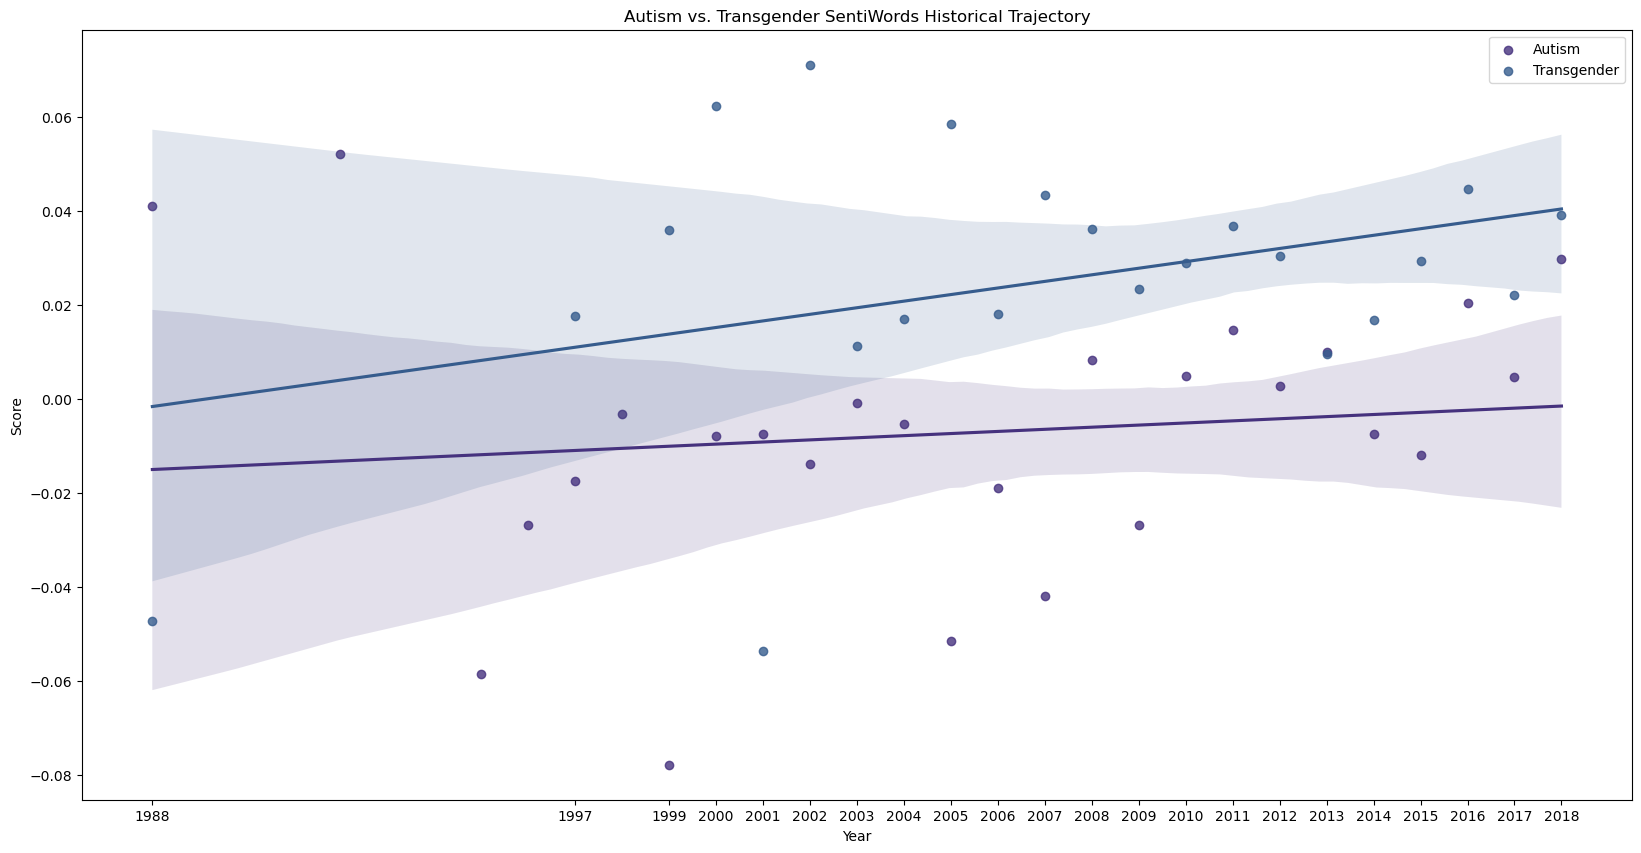

In [7]:
# Autism vs. Transgender SentiWords

# Combine dataframes

combined_df_sentiwords_years = graphing_years_sentiwords_transgender.merge(graphing_years_sentiwords_autism, how='outer', on=['Year'])
# print(combined_df_sentiwords_years) # Score_x = transgender, Score_y = autism

df_sentiwords = combined_df_sentiwords_years.merge(combined_df_sentiwords, how='outer')

print(df_sentiwords)

res = smf.ols(formula='Score_x ~ Score_y', data=combined_df_sentiwords_years).fit() # y ~ x
display(res.summary())
# res = smf.ols(formula='Score ~ Year', data=graphing_years_sentiwords_autism).fit() # y ~ x
# display(res.summary())

# ttest_transgender_years = stats.ttest_ind(graphing_years_sentiwords_autism["Score"], graphing_years_sentiwords_transgender["Score"], equal_var=False)
# print("T-Test: ", ttest_transgender) 

fig, ax = plt.subplots(figsize=(20, 10)) 

os.chdir(results_dir)

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_sentiwords_autism, label="Autism")
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_sentiwords_transgender, label="Transgender")

ax.legend()
ax.set_xticks(graphing_years_sentiwords_transgender["Year"])
ax.set_title("Autism vs. Transgender SentiWords Historical Trajectory")
plt.savefig('years_comparison_sentiwords.png') # Not significantly different

    Unnamed: 0_x  Year   Score_x  Unnamed: 0_y   Score_y     Type
0         1988.0  1988  0.637290          1988 -1.867855  ChatGPT
1         1997.0  1997  0.933866          1997 -0.343447  ChatGPT
2         1999.0  1999  0.354570          1999 -1.108525  ChatGPT
3         2000.0  2000  0.534619          2000 -0.252563  ChatGPT
4         2001.0  2001  0.783589          2001 -0.508578  ChatGPT
5         2002.0  2002  0.385299          2002 -0.342893  ChatGPT
6         2003.0  2003  0.236318          2003 -0.089278  ChatGPT
7         2004.0  2004  0.541201          2004  0.243029  ChatGPT
8         2005.0  2005  0.156394          2005 -0.091470  ChatGPT
9         2006.0  2006  0.195465          2006 -0.510913  ChatGPT
10        2007.0  2007  0.591467          2007 -0.336079  ChatGPT
11        2008.0  2008  0.341993          2008 -0.190138  ChatGPT
12        2009.0  2009  0.634334          2009 -0.663741  ChatGPT
13        2010.0  2010  0.310998          2010  0.158882  ChatGPT
14        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Score_x   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.1577
Date:                Thu, 04 Apr 2024   Prob (F-statistic):              0.695
Time:                        22:19:54   Log-Likelihood:               -0.23712
No. Observations:                  22   AIC:                             4.474
Df Residuals:                      20   BIC:                             6.656
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4380     15.046     -0.361      0.722     -36.824      25.948
Year           0.0030      0.007      0.397      0.695      -0.013       0.019
==============================================================================
Omnibus:                        4.243   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                1.486
Skew:                          -0.064   Prob(JB):                        0.476
Kurtosis:                       1.733   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Score_y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     34.83
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           4.34e-06
Time:                        22:19:54   Log-Likelihood:                -15.076
No. Observations:                  26   AIC:                             34.15
Df Residuals:                      24   BIC:                             36.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -130.9255     22.131     -5.916      0.000    -176.601     -85.250
Year           0.0651      0.011      5.902      0.000       0.042       0.088
==============================================================================
Omnibus:                        5.048   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                3.175
Skew:                          -0.737   Prob(JB):                        0.204
Kurtosis:                       3.870   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

0     2.505145
1     1.277313
2     1.463095
3     0.787183
4     1.292167
5     0.728192
6     0.325597
7     0.298172
8     0.247864
9     0.706378
10    0.927546
11    0.532131
12    1.298074
13    0.152116
14    1.306333
15    0.561219
16   -0.091827
17    0.272188
18    0.592226
19    0.523866
20    0.234589
21    0.073511
22         NaN
23         NaN
24         NaN
25         NaN
Name: Difference, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Difference   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     20.97
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           0.000182
Time:                        22:19:54   Log-Likelihood:                -11.649
No. Observations:                  22   AIC:                             27.30
Df Residuals:                      20   BIC:                             29.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.4747     25.276      4.608      0.000      63.749     169.200
Year          -0.0577      0.013     -4.579      0.000      -0.084      -0.031
==============================================================================
Omnibus:                        0.635   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.685
Skew:                           0.212   Prob(JB):                        0.710
Kurtosis:                       2.246   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

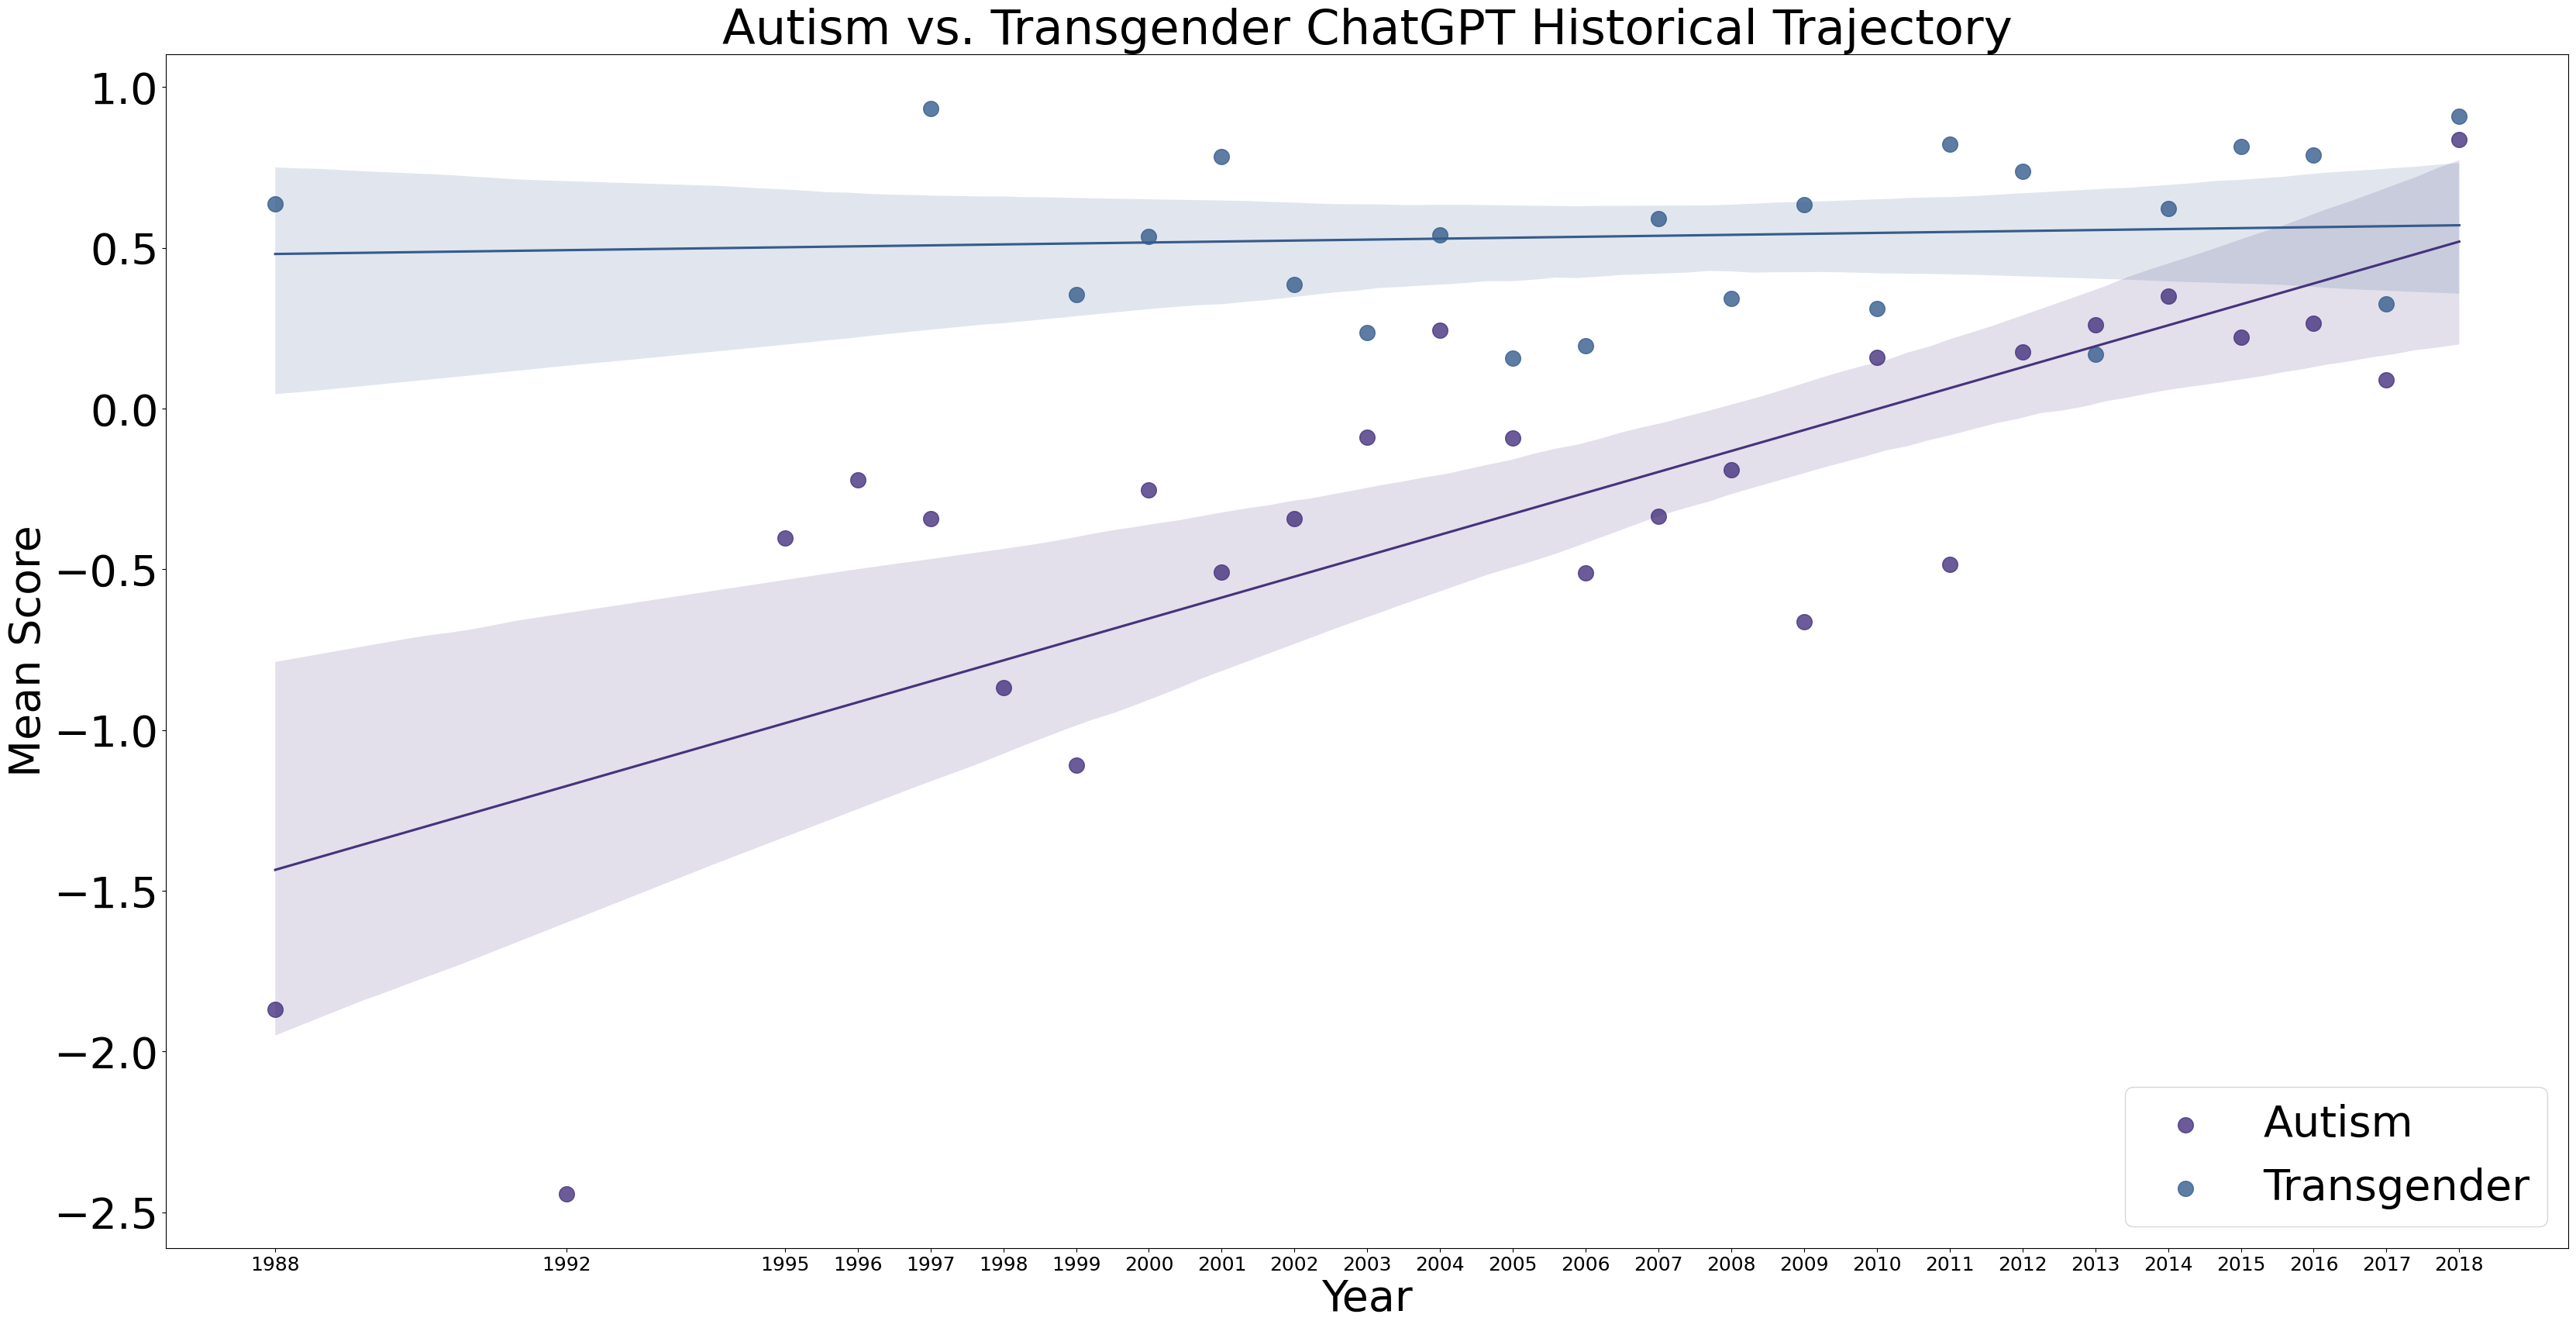

In [33]:
# Autism vs. Transgender ChatGPT

# Combine dataframes

combined_df_chatgpt_years = graphing_years_chatgpt_transgender.merge(graphing_years_chatgpt_autism, how='outer', on=['Year'])
print(combined_df_chatgpt_years) # Score_x = transgender, Score_y = autism

# print(combined_df_chatgpt)

res = smf.ols(formula='Score_x ~ Year', data=combined_df_chatgpt_years).fit() # y ~ x
display(res.summary())

res = smf.ols(formula='Score_y ~ Year', data=combined_df_chatgpt_years).fit() # y ~ x
display(res.summary())

combined_df_chatgpt_years["Difference"] = combined_df_chatgpt_years["Score_x"] - combined_df_chatgpt_years["Score_y"]

print(combined_df_chatgpt_years["Difference"])

res = smf.ols(formula="Difference ~ Year", data=combined_df_chatgpt_years).fit() # y ~ x
display(res.summary())
# res = smf.ols(formula='Score ~ Year', data=graphing_years_sentiwords_autism).fit() # y ~ x
# display(res.summary())

fig, ax = plt.subplots(figsize=(40, 20)) 

os.chdir(results_dir)

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_chatgpt_autism, label="Autism", scatter_kws={'s':200})
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_chatgpt_transgender, label="Transgender", scatter_kws={'s':200})


ax.legend(loc="lower right", fontsize=40)
ax.set_xticks(graphing_years_chatgpt_autism["Year"]) # has more years
plt.xticks(fontsize=18)
plt.yticks(fontsize=40)
ax.set_title("Autism vs. Transgender ChatGPT Historical Trajectory", fontsize=45)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Mean Score", fontsize=40)
plt.savefig('years_comparison_chatgpt.png') # Not significantly different

    Unnamed: 0_x  Year     Score        Type  Unnamed: 0_y  Unnamed: 0
0         1988.0  1988  0.041096  SentiWords           NaN         NaN
1         1992.0  1992  0.052124  SentiWords           NaN         NaN
2         1995.0  1995 -0.058537  SentiWords           NaN         NaN
3         1996.0  1996 -0.026727  SentiWords           NaN         NaN
4         1997.0  1997 -0.017366  SentiWords           NaN         NaN
..           ...   ...       ...         ...           ...         ...
73           NaN  2014  0.217746  Dictionary           NaN      2014.0
74           NaN  2015  0.185931  Dictionary           NaN      2015.0
75           NaN  2016  0.281926  Dictionary           NaN      2016.0
76           NaN  2017  0.184443  Dictionary           NaN      2017.0
77           NaN  2018  0.246185  Dictionary           NaN      2018.0

[78 rows x 6 columns]
F_onewayResult(statistic=11.10867744172253, pvalue=5.948464287940188e-05)


group1,group2,meandiff,p-adj,lower,upper,reject
ChatGPT,Dictionary,0.5211,0.0,0.2555,0.7867,True
ChatGPT,SentiWords,0.3051,0.0204,0.0395,0.5707,True
Dictionary,SentiWords,-0.216,0.1336,-0.4816,0.0497,False


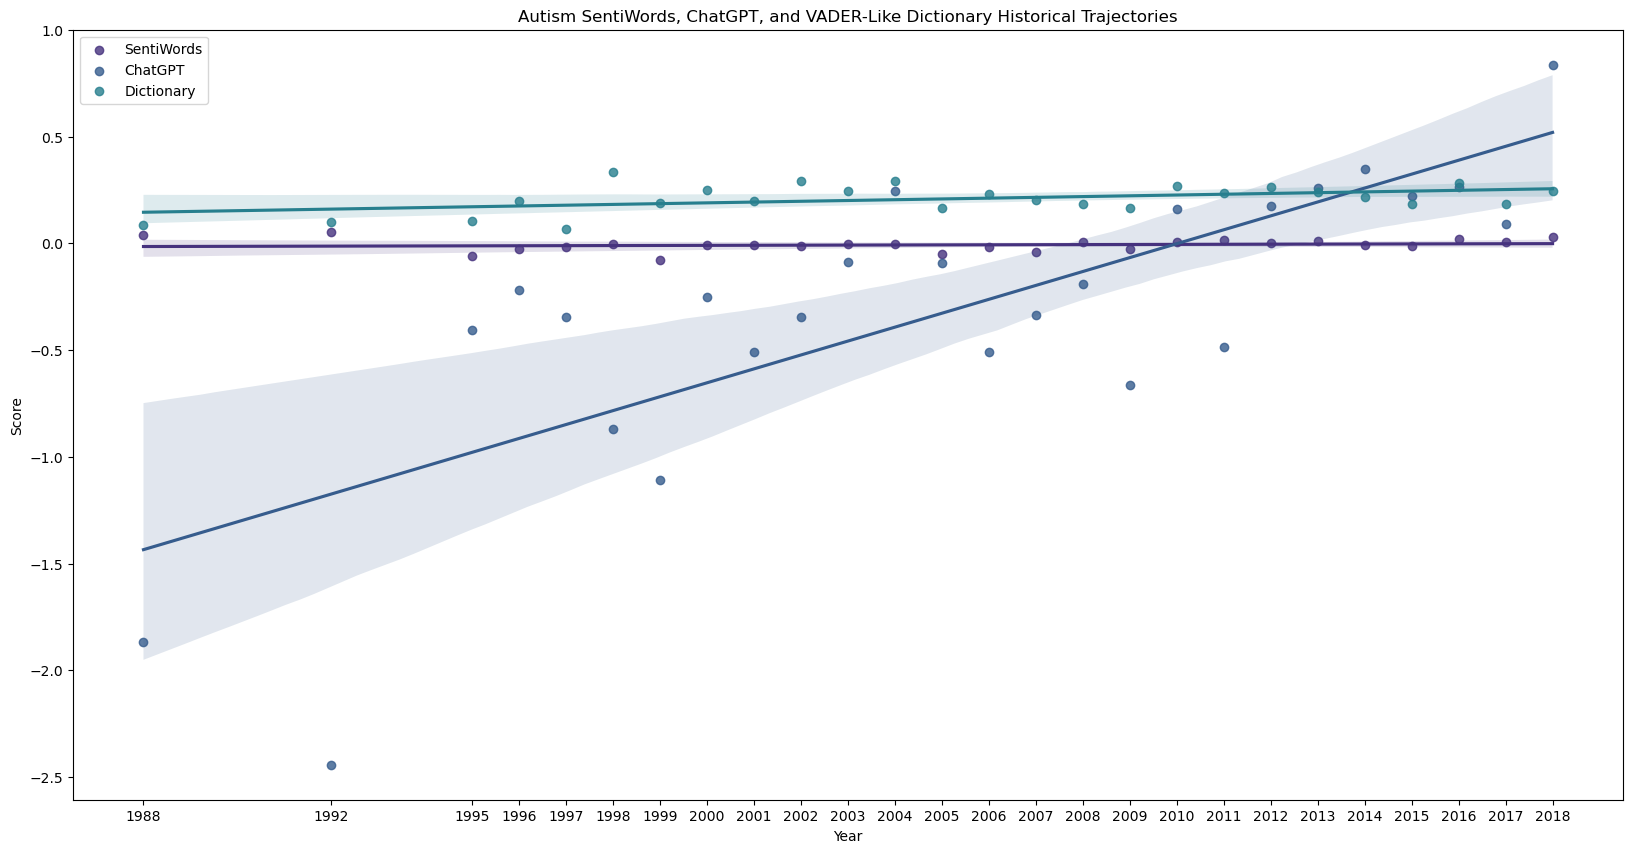

In [9]:
# Autism ChatGPT vs. SentiWords vs. VADER-like Dictionary

graphing_years_sentiwords_autism["Type"] = "SentiWords"
graphing_years_chatgpt_autism["Type"] = "ChatGPT"
graphing_years_dictionary_autism["Type"] = "Dictionary"

combined_df_autism_intermediate_years = graphing_years_sentiwords_autism.merge(graphing_years_chatgpt_autism, how='outer', on=["Year", "Type", "Score"])
combined_df_autism_years = combined_df_autism_intermediate_years.merge(graphing_years_dictionary_autism, how="outer", on=["Year", "Type", "Score"])

print(combined_df_autism_years) # score_x = sentiwords, score_y = chatgpt, score = dictionary

# T-Test and ANOVA for SentiWords Autism and Transgender (Fields)

anova = f_oneway(combined_df_autism_years[combined_df_autism_years['Type'] == 'ChatGPT']["Score"], 
                 combined_df_autism_years[combined_df_autism_years['Type'] == 'SentiWords']['Score'],
        combined_df_autism_years[combined_df_autism_years['Type'] == 'Dictionary']['Score'])

print(anova)

# Post-hoc testing

comp = mc.MultiComparison(combined_df_autism_years['Score'], combined_df_autism_years['Type'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())

# Graphing

fig, ax = plt.subplots(figsize=(20, 10)) 

os.chdir(results_dir)

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_sentiwords_autism, label="SentiWords" )
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_chatgpt_autism, label="ChatGPT")
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_dictionary_autism, label="Dictionary")

ax.legend()
ax.set_xticks(graphing_years_chatgpt_autism["Year"]) # has more years
ax.set_title("Autism SentiWords, ChatGPT, and VADER-Like Dictionary Historical Trajectories")
plt.savefig('years_comparison_autism.png') # All significantly different, except Dictionary vs. SentiWords?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Score_x   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.5677
Date:                Thu, 04 Apr 2024   Prob (F-statistic):              0.460
Time:                        15:43:12   Log-Likelihood:              -0.015624
No. Observations:                  22   AIC:                             4.031
Df Residuals:                      20   BIC:                             6.213
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5733      0.072      7.965      0.000       0.423       0.723
Score_y       -1.4232      1.889     -0.753      0.460      -5.363       2.517
==============================================================================
Omnibus:                        3.185   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                1.298
Skew:                          -0.008   Prob(JB):                        0.523
Kurtosis:                       1.810   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

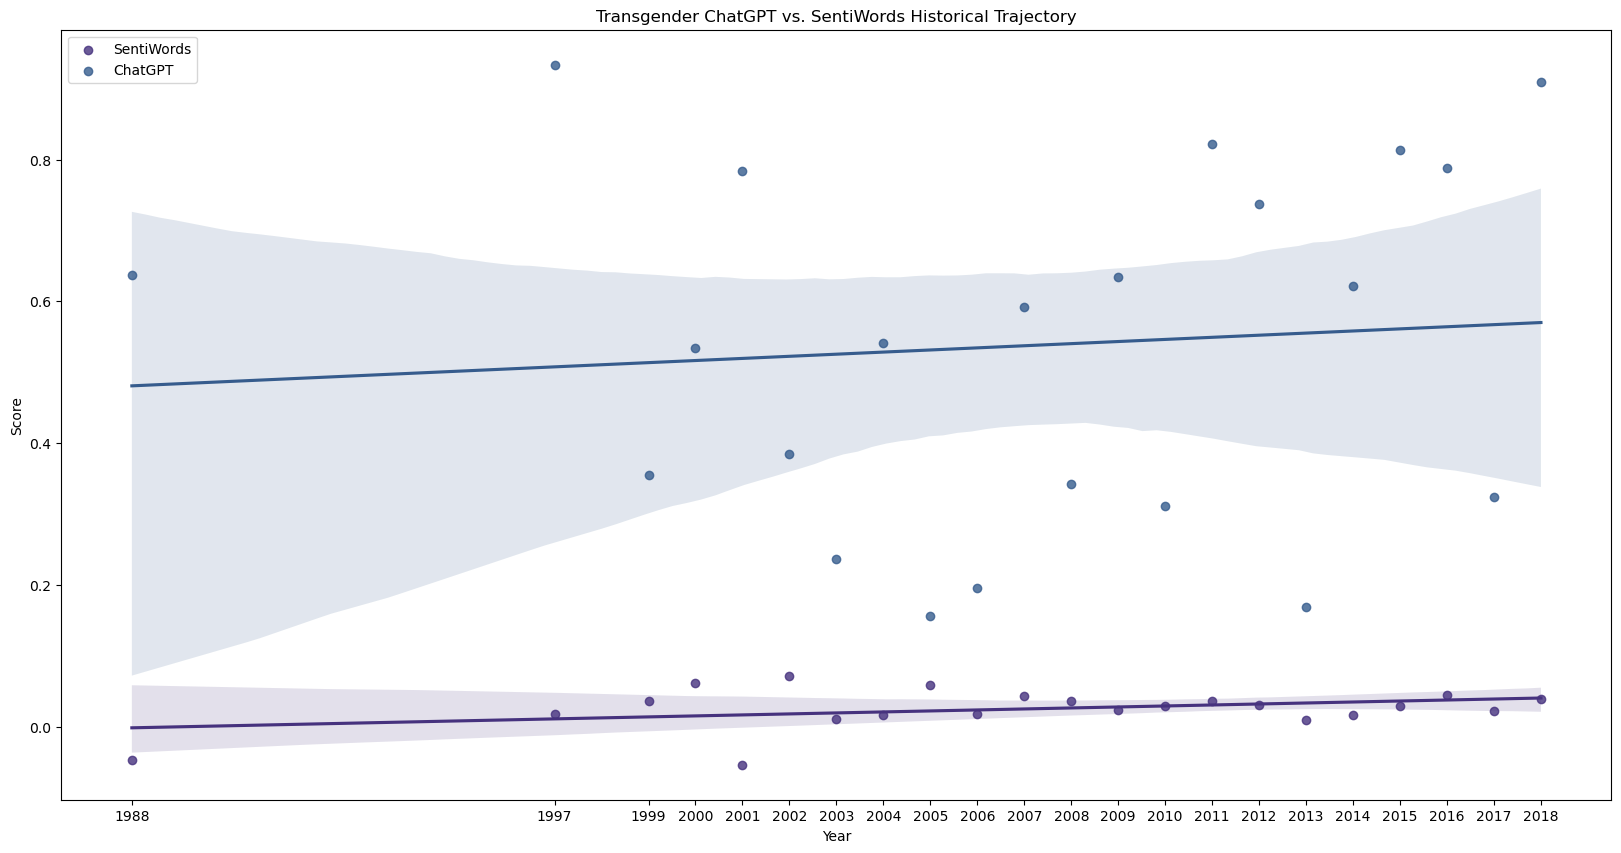

In [10]:
# Transgender ChatGPT vs. SentiWords

# Combine dataframes

combined_df_transgender_years = graphing_years_chatgpt_transgender.merge(graphing_years_sentiwords_transgender, how='outer', on=['Year'])
# print(combined_df_sentiwords_years) # Score_x = chatgpt, Score_y = sentiwords

res = smf.ols(formula='Score_x ~ Score_y', data=combined_df_transgender_years).fit() # y ~ x
display(res.summary())
# res = smf.ols(formula='Score ~ Year', data=graphing_years_sentiwords_autism).fit() # y ~ x
# display(res.summary())

fig, ax = plt.subplots(figsize=(20, 10)) 

os.chdir(results_dir)

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_sentiwords_transgender, label="SentiWords")
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years_chatgpt_transgender, label="ChatGPT")

ax.legend()
ax.set_xticks(graphing_years_chatgpt_transgender["Year"])
ax.set_title("Transgender ChatGPT vs. SentiWords Historical Trajectory")
plt.savefig('years_comparison_transgender.png') # Not significantly different